# Loading and Describing Dataset

In [1]:
#importing necessary libraries from python
#pandas is a powerful library used for processing datasets(.csv, .xlsx, etc files) as dataframes
import pandas as pd
#numpy library helps in calculations for large amounts of data
import numpy as np

In [2]:
#reading the csv file
#the file should be in the same folder as this ipynb notebook
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.shape
#(rows, columns)

(200000, 9)

In [4]:
#gives details/summary about all the columns in dataset
#number of rows(entries)
#count of all the non-null values in each column
#datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


# Preprocessing and Cleaning

In [5]:
#we try to identify null values and outliers and handling them by converting

In [6]:
#isna() and isnull() are the same
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
df.isna().sum().sum()
#we get total number of null values in the dataset
#here in this case we have 2 null values

2

In [8]:
#we replace the null values in the dropoff_latitude column with mean value
df['dropoff_latitude'].fillna(value = df['dropoff_latitude'].mean(), inplace = True)

#latitudes are continuously distributed and so are replaced by mean value

In [9]:
#we replace the null values in the dropoff_longitude column with median value
df['dropoff_longitude'].fillna(value = df['dropoff_longitude'].median(), inplace = True)

#longitudes are non-continuously distributed

In [10]:
#displaying the datatypes for each column
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [11]:
#we change the datatype of the pickup_datetime column
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1


In [12]:
df.pickup_datetime.dtype

datetime64[ns, UTC]

In [13]:
#extracting hour, day, month, year and day of week from pickup_datetime
df = df.assign(
    hour = df.pickup_datetime.dt.hour,
    day = df.pickup_datetime.dt.day,
    month = df.pickup_datetime.dt.month,
    year = df.pickup_datetime.dt.year,
    dayofweek = df.pickup_datetime.dt.dayofweek)
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


# Haversine Formula

In [14]:
# hav(theta) = (sin(theta/2)) ** 2
# a = hav(latitude2 - latitude1) + cos(latitude1) * cos(latitude2) * hav(longitude2 - longitude1)
# d = 2 * asin(sqrt(a)) * 6371
# 6371 is the earth's radius in km

In [15]:
from math import *

def dist_travel(longitude1,latitude1, longitude2, latitude2):
    distance = []
    
    for pos in range(len(longitude1)):
        lo1, l1, lo2, l2 = map(radians, [longitude1[pos], latitude1[pos], longitude2[pos], latitude2[pos]])
        a = sin((l2 - l1)/2)**2 + cos(l1) * cos(l2) * sin((lo2 - lo1)/2)**2
        d = 2 * asin(sqrt(a)) * 6371
        distance.append(d)
             
    return distance
                                         

In [16]:
#converting each column to an array using to_numpy() and passing it to the function in previous step
df['dist_travel'] = dist_travel(df['pickup_longitude'].to_numpy(),
                                                df['pickup_latitude'].to_numpy(),
                                                df['dropoff_longitude'].to_numpy(),
                                                df['dropoff_latitude'].to_numpy()
                                              )

In [17]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6,0.112210
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4,1.875050
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0,12.850319
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2015,2,3.539715


In [18]:

df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month', 'year',
       'dayofweek', 'dist_travel'],
      dtype='object')

In [19]:
df = df.drop(['Unnamed: 0', 'key', 'pickup_datetime'], axis = 1)

In [20]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6,0.112210
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4,1.875050
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0,12.850319
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2015,2,3.539715


# outliers

In [21]:
#outliers are data points that deviate from the overall distribution
import matplotlib.pyplot as plt

In [22]:
# to understand the boxplots better, we first get the information
# for example we have the minimum and maximum values for each column
# 50% percentile represents median
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525299,39.923890,1.684535,13.491335,15.704670,6.281795,2011.742440,3.048425,20.855722
std,9.901776,11.437787,7.720539,13.117375,6.794812,1.385997,6.515531,8.687409,3.438925,1.856397,1.946946,382.963721
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000,1.215222
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000,2.121005
75%,12.500000,-73.967154,40.767158,-73.963659,40.768001,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000,3.875248
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,23.000000,31.000000,12.000000,2015.000000,6.000000,16409.239135


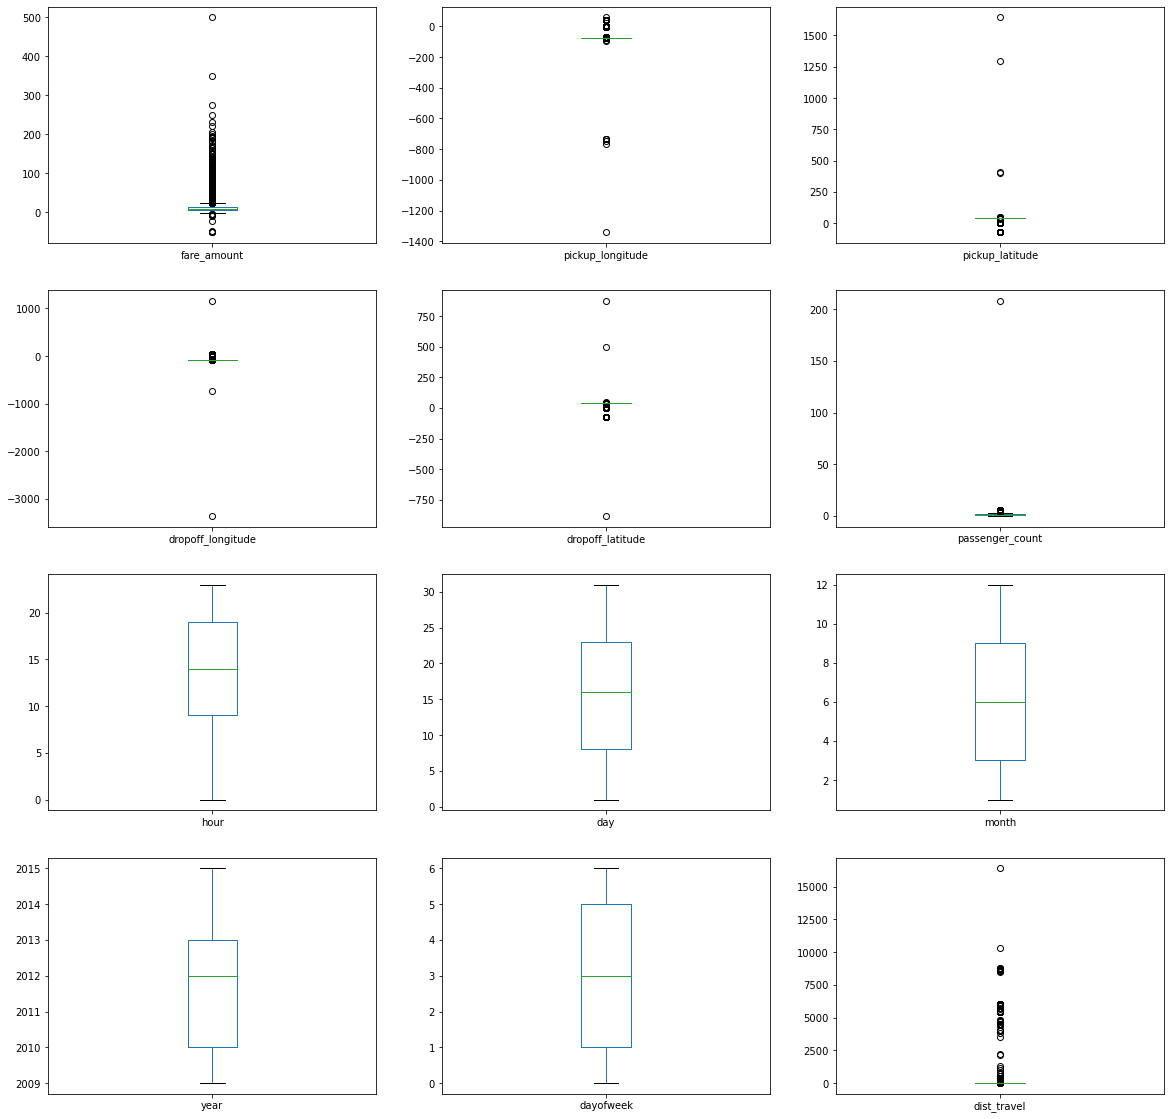

In [23]:
#boxplots are best to highlight outliers in data
df.plot(kind = 'box', subplots = True, layout = (4,3), figsize = (20,20))
plt.show()

In [24]:
#handling the outliers
# IQR (Interquartile Range)
# measures the spread of data

#procedure
# arrange dataset in ascending order
# calculate median of lower quartile, Q1
# calculate median of upper quartile, Q2
# IQR = Q3 - Q1
# then find lower bound and Upper bound outlier threshold 
# any data lower that lower bound or higher than upper bound is an OUTLIER

def remove(df1, column):
    q1 = df1[column].quantile(0.25) #median of lower quartile
    q3 = df1[column].quantile(0.75) #median of upper quartile
    IQR = q3 - q1
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)
    df[column] = np.clip(df1[column], lower_bound, upper_bound)
    return df1

def treat_outliers(df1, col_list):
    for col in col_list:
        df1 = remove(df1, col)
    return df1

df = treat_outliers(df, list(df.columns))

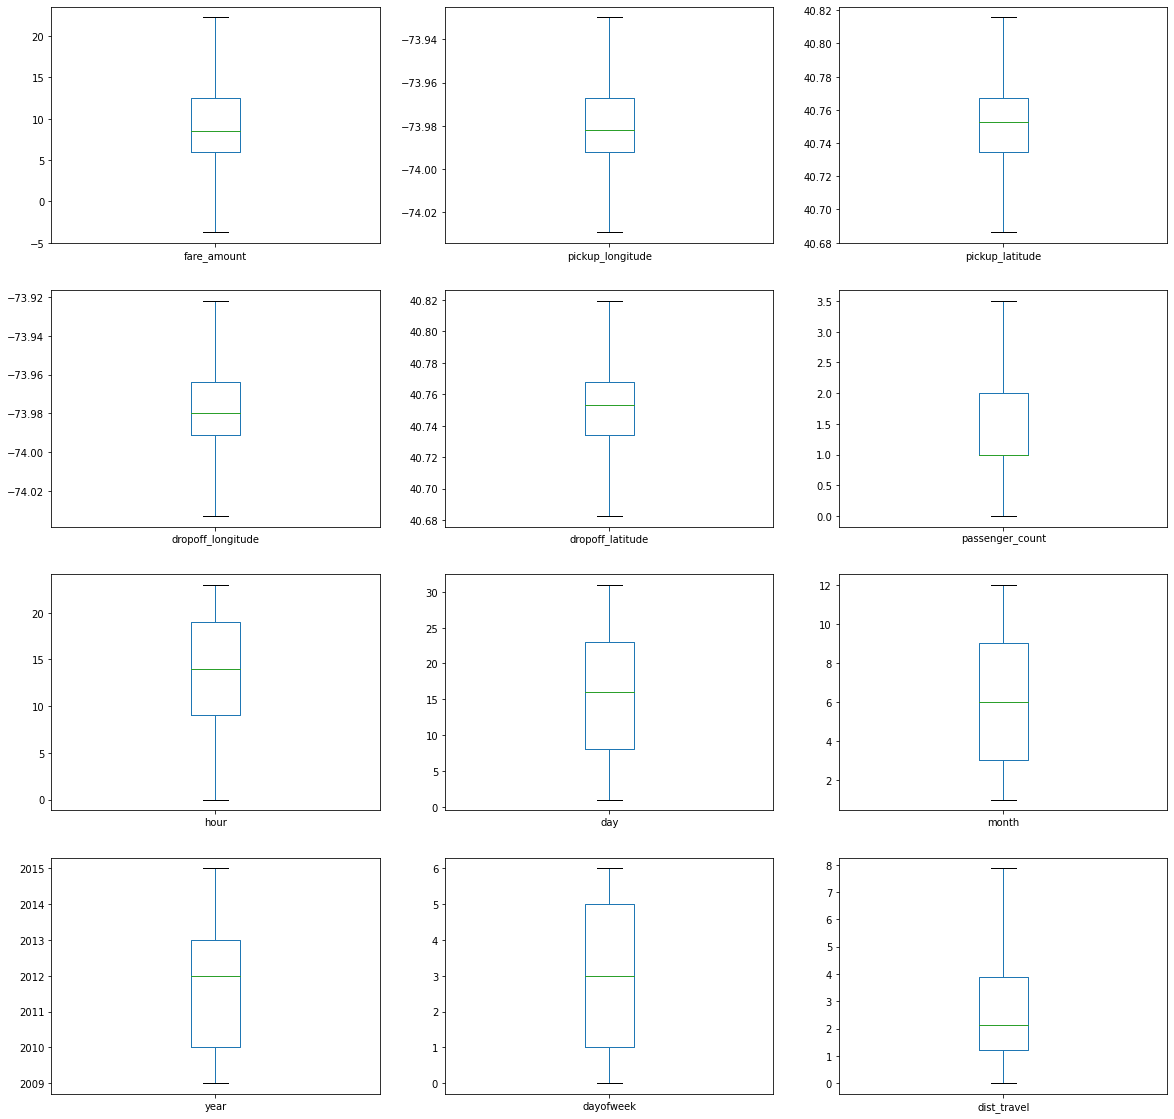

In [25]:
df.plot(kind = 'box', subplots = True, layout = (4,3), figsize = (20,20))
plt.show()
#it is observed that the outliers have been removed

# Correlation

In [26]:
# correlation indicates similarity between two things
# here it means how to variables change together
# values near -1 (strong negative correlation), 1(strong positive correlation), 0(no linear relationaship)
# heatmap indicates all the correlation values

corr = df.corr()
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel
fare_amount,1.000000,0.154069,-0.110842,0.218675,-0.125898,0.015778,-0.023623,0.004534,0.030817,0.141277,0.013652,0.844374
pickup_longitude,0.154069,1.000000,0.259497,0.425619,0.073290,-0.013213,0.011579,-0.003204,0.001169,0.010198,-0.024652,0.098094
pickup_latitude,-0.110842,0.259497,1.000000,0.048889,0.515714,-0.012889,0.029681,-0.001553,0.001562,-0.014243,-0.042310,-0.046812
dropoff_longitude,0.218675,0.425619,0.048889,1.000000,0.245667,-0.009303,-0.046558,-0.004007,0.002391,0.011346,-0.003336,0.186531
dropoff_latitude,-0.125898,0.073290,0.515714,0.245667,1.000000,-0.006308,0.019783,-0.003479,-0.001193,-0.009603,-0.031919,-0.038900
passenger_count,0.015778,-0.013213,-0.012889,-0.009303,-0.006308,1.000000,0.020274,0.002712,0.010351,-0.009749,0.048550,0.009709
hour,-0.023623,0.011579,0.029681,-0.046558,0.019783,0.020274,1.000000,0.004677,-0.003926,0.002156,-0.086947,-0.038366
day,0.004534,-0.003204,-0.001553,-0.004007,-0.003479,0.002712,0.004677,1.000000,-0.017360,-0.012170,0.005617,0.003062
month,0.030817,0.001169,0.001562,0.002391,-0.001193,0.010351,-0.003926,-0.017360,1.000000,-0.115859,-0.008786,0.011628
year,0.141277,0.010198,-0.014243,0.011346,-0.009603,-0.009749,0.002156,-0.012170,-0.115859,1.000000,0.006113,0.024278


In [27]:
import seaborn as sns

<AxesSubplot:title={'center':'Correlation Heatmap'}>

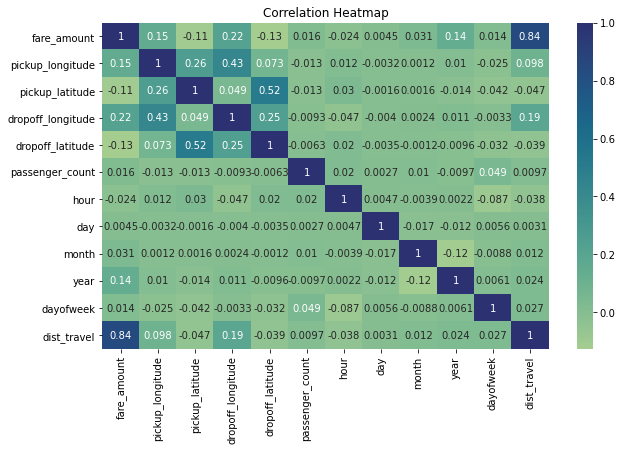

In [28]:
fig,axis = plt.subplots(figsize = (10,6))
plt.title('Correlation Heatmap')
sns.heatmap(df.corr(), cmap ='crest',annot = True) 

# Distribution of Pickup location

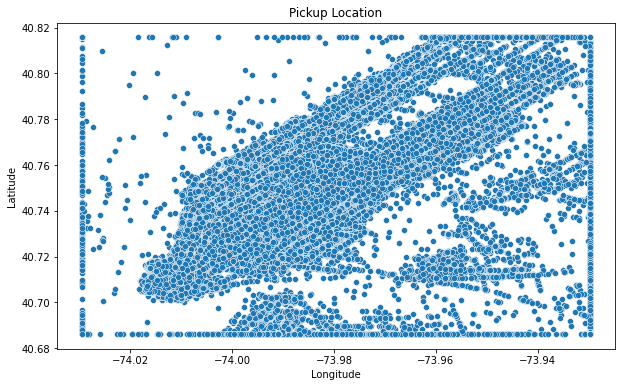

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df)
plt.title('Pickup Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

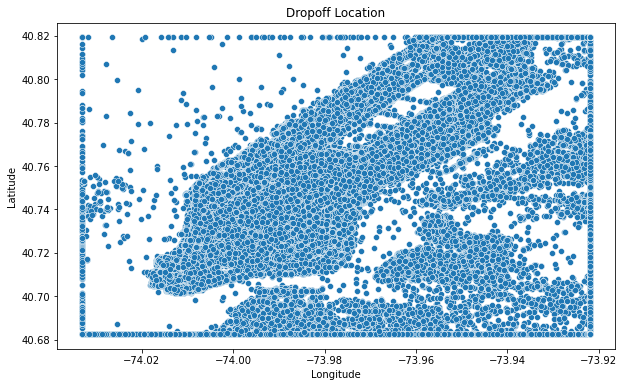

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', data=df)
plt.title('Dropoff Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Distribution of Rides by Hour

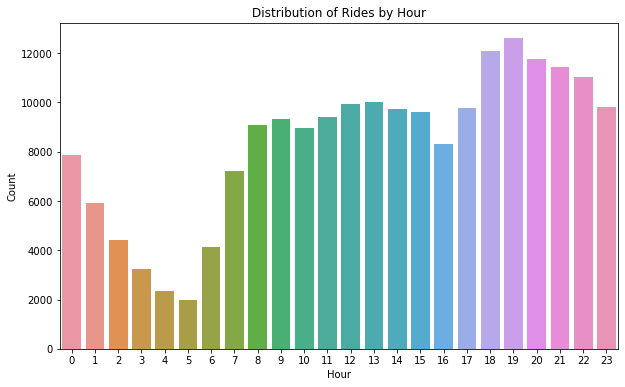

In [31]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'hour', data = df)
plt.title('Distribution of Rides by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

# Distribution of Rides by Day of Week

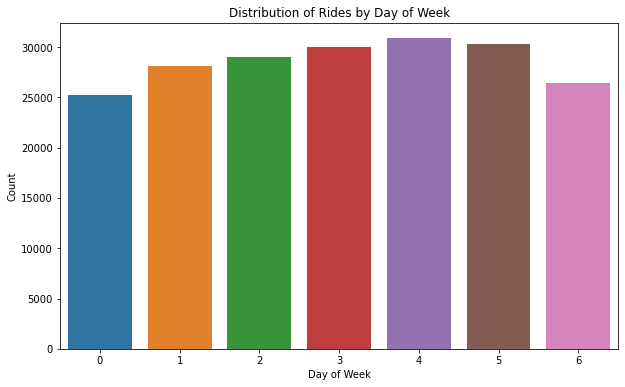

In [32]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'dayofweek', data = df)
plt.title('Distribution of Rides by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

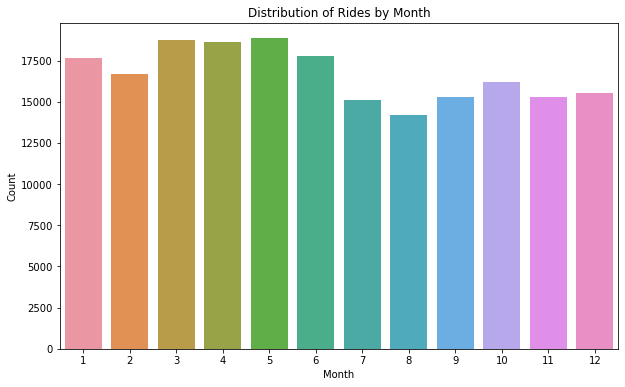

In [33]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'month', data = df)
plt.title('Distribution of Rides by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

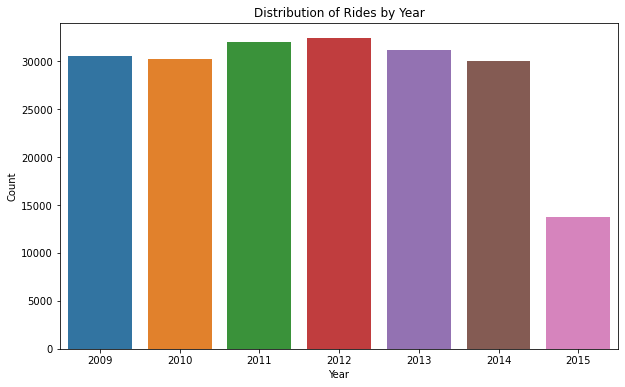

In [34]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'year', data = df)
plt.title('Distribution of Rides by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Average Fare Amount

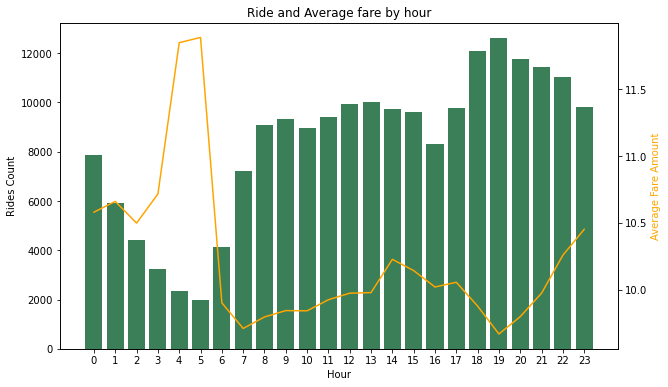

In [35]:
rides_hour = df.groupby('hour').size()
avg_fare_hour = df.groupby('hour')['fare_amount'].mean()

fig, axis = plt.subplots(figsize = (10, 6))
sns.barplot(x = rides_hour.index, y = rides_hour, ax = axis, color= "seagreen")
axis.set_xlabel('Hour')
axis.set_ylabel('Rides Count')
axis.set_title('Ride and Average fare by hour')

axis2 = axis.twinx()
sns.lineplot(x = avg_fare_hour.index, y = avg_fare_hour, ax = axis2, color = "orange")
axis2.set_ylabel('Average Fare Amount', color='orange')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
# Split the data into features (X) and target variable (y)
X = df.drop(['fare_amount'], axis=1)
y = df['fare_amount']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [39]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Absolute Error: 1.825146579834386
Root Mean Squared Error: 2.777743152909903
R-squared: 0.7406586614134063


In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 1.52
Root Mean Squared Error: 2.41
R-squared: 0.80


In [42]:
#Prediction made using Random ForestRegressor is better than the linear regression model
#0.8 more closer to 1